In [50]:
pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.3/384.3 kB 13.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 8.3 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 18.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492024 sha256=870910194d5f9f2bdf760ccaaabdf55b38c2378e004de9a40d9d6f970284747d
  Stored in directory: /Users/Cow1998/Library/Caches/pip/wheels/a6/db/41/71a0e5d071a14e716cc11bb021a9caa8f76ec337eca071487e
Successfully built future

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 7.1 MB/s eta 0:00:0000:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

In [66]:
valid_part = 0.3
pd.set_option('max_columns',50)

In [67]:
train0 = pd.read_csv('vehicles.csv')
train0.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,az,nan,nan,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,ar,nan,nan,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,fl,nan,nan,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,ma,nan,nan,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nc,nan,nan,NaN


In [68]:
drop_columns = ['id','url', 'region', 'region_url', 'VIN', 'description', 'county','image_url', 'lat','long', 'posting_date']
train0 = train0.drop(columns = drop_columns)
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


In [69]:
numerics = ['float16', 'float32', 'float64', 'int8', 'int16', 'int32', 'int64']
categorical_cols = []
features = train0.columns.values.tolist()
for col in features:
    if train0[col].dtype in numerics:
        continue
    categorical_cols.append(col)
features = ['model','drive','fuel','manufacturer']
label_arr = []
for col in categorical_cols:
    if col in train0.columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(list(train0[col].astype(str).values))
        train0[col] = label_encoder.transform(list(train0[col].astype(str).values))
        le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        print(le_name_mapping)
# print(label_arr)

{'acura': 0, 'alfa-romeo': 1, 'aston-martin': 2, 'audi': 3, 'bmw': 4, 'buick': 5, 'cadillac': 6, 'chevrolet': 7, 'chrysler': 8, 'datsun': 9, 'dodge': 10, 'ferrari': 11, 'fiat': 12, 'ford': 13, 'gmc': 14, 'harley-davidson': 15, 'honda': 16, 'hyundai': 17, 'infiniti': 18, 'jaguar': 19, 'jeep': 20, 'kia': 21, 'land rover': 22, 'lexus': 23, 'lincoln': 24, 'mazda': 25, 'mercedes-benz': 26, 'mercury': 27, 'mini': 28, 'mitsubishi': 29, 'morgan': 30, 'nan': 31, 'nissan': 32, 'pontiac': 33, 'porsche': 34, 'ram': 35, 'rover': 36, 'saturn': 37, 'subaru': 38, 'tesla': 39, 'toyota': 40, 'volkswagen': 41, 'volvo': 42}
{'"t"': 0, '$362.47, $1000 down, oac, 2.9%apr $362.47,luxury low miles $1000 down, only 40k miles': 1, '%': 2, '& altima': 3, "'50 Business Coupe": 4, "'99 H1 Hummer": 5, '(210)': 6, '(300)': 7, '(cng) 2500 express van': 8, '(s)port (s)edan': 9, '* vmi * ♿': 10, '*matrix*': 11, ',,,,,,,': 12, ',2012,2013, SOME 2014 MODELS': 13, ',2017,2016,2015 MODELS': 14, '-': 15, '- 1500': 16, '- 15

In [9]:
# year range (1960, 2021)
train0.drop(train0[train0.year < 1960].index, inplace = True)
train0.drop(train0[train0.year > 2021].index, inplace = True)

# price range (100, 100,000)
train0.drop(train0[train0.price < 100].index, inplace = True)
train0.drop(train0[train0.price > 100000].index, inplace = True)

# delete missing vals
train0 = train0.dropna(axis = 0, subset = ['year', 'manufacturer', 'model', 'fuel', 'odometer', 'transmission'])

# imputate with mode
train0['title_status'].fillna(train0['title_status'].mode(), inplace = True)
train0['drive'].fillna(train0['drive'].mode(), inplace = True)
train0['size'].fillna(train0['size'].mode(), inplace = True)
train0['type'].fillna(train0['type'].mode(), inplace = True)
train0['paint_color'].fillna(train0['paint_color'].mode(), inplace = True)
train0['condition'].fillna(train0['condition'].mode(), inplace = True)
train0['cylinders'].fillna(train0['cylinders'].mode(), inplace = True)

train0['odometer'] = (train0['odometer']).astype(int)
train0.drop_duplicates(inplace = True, ignore_index = True)

train0 = train0[['price','year','odometer','model','drive','fuel','manufacturer']]

In [10]:
train0.head(10)

,price,year,odometer,model,drive,fuel,manufacturer
0,33590,2014.0,57923,24360,2,2,14
1,22590,2010.0,71229,24761,2,2,7
2,39590,2020.0,19160,24808,2,2,7
3,30990,2017.0,41124,27869,2,2,40
4,15000,2013.0,128000,14531,3,2,13
5,27990,2012.0,68696,24490,0,2,14
6,34590,2016.0,29499,24821,0,2,7
7,35000,2019.0,43000,26359,0,2,40
8,29990,2016.0,17302,11026,0,2,7
9,38590,2011.0,30237,11462,3,2,7


Exploratory Data Analysis (EDA) using pandas profiling

In [9]:
train0['price'].value_counts()

4500     2466
3500     2390
5500     2282
6500     2272
6995     2208
         ... 
19903       1
30802       1
17854       1
10328       1
4098        1
Name: price, Length: 15180, dtype: int64

In [10]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272669 entries, 0 to 272668
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         272669 non-null  int64  
 1   year          272669 non-null  float64
 2   manufacturer  272669 non-null  int64  
 3   model         272669 non-null  int64  
 4   condition     272669 non-null  int64  
 5   cylinders     272669 non-null  int64  
 6   fuel          272669 non-null  int64  
 7   odometer      272669 non-null  int64  
 8   title_status  272669 non-null  int64  
 9   transmission  272669 non-null  int64  
 10  drive         272669 non-null  int64  
 11  size          272669 non-null  int64  
 12  type          272669 non-null  int64  
 13  paint_color   272669 non-null  int64  
 14  state         272669 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 31.2 MB


In [11]:
train0.describe()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
count,272669.000000,272669.000000,272669.000000,272669.000000,272669.000000,272669.000000,272669.000000,2.726690e+05,272669.000000,272669.000000,272669.000000,272669.000000,272669.000000,272669.000000,272669.000000
mean,17529.437050,2010.542786,19.695367,16826.967404,2.260349,5.499184,2.071783,1.037290e+05,0.234508,0.457955,1.274622,2.426546,6.455461,6.108292,23.671415
std,14168.067498,8.806939,12.113844,7724.266996,1.587494,1.544081,0.922170,1.949398e+05,1.032302,1.010513,1.046670,0.948755,3.951090,3.872175,15.097210
min,100.000000,1960.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6700.000000,2007.000000,10.000000,11206.000000,0.000000,5.000000,2.000000,4.253500e+04,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,9.000000
50%,13900.000000,2013.000000,16.000000,17132.000000,2.000000,6.000000,2.000000,9.316500e+04,0.000000,0.000000,1.000000,3.000000,6.000000,6.000000,23.000000
75%,25000.000000,2016.000000,31.000000,23489.000000,4.000000,7.000000,2.000000,1.409980e+05,0.000000,0.000000,2.000000,3.000000,10.000000,10.000000,37.000000
max,100000.000000,2021.000000,42.000000,29667.000000,6.000000,8.000000,5.000000,1.000000e+07,6.000000,3.000000,3.000000,4.000000,13.000000,12.000000,50.000000


In [12]:
train0.corr()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
price,1.000000,0.398424,-0.050181,0.024576,0.126236,0.240670,-0.008885,-0.183315,-0.086737,0.257550,-0.062048,0.138738,0.057436,0.021891,0.008917
year,0.398424,1.000000,-0.010794,0.060289,0.107794,0.015568,0.133508,-0.178640,0.013283,0.186818,-0.164681,0.146582,0.033936,0.000501,0.009769
manufacturer,-0.050181,-0.010794,1.000000,-0.052268,-0.010853,-0.106566,-0.039566,0.013894,0.016048,0.002738,-0.077693,-0.000642,0.035163,0.008460,-0.016623
model,0.024576,0.060289,-0.052268,1.000000,0.003322,0.030529,0.060351,-0.009482,-0.010156,0.014819,-0.109160,0.020170,-0.099385,0.002537,0.006621
condition,0.126236,0.107794,-0.010853,0.003322,1.000000,0.248709,0.022535,-0.024669,-0.053682,-0.044187,0.041500,0.247718,0.006144,-0.003356,0.018953
cylinders,0.240670,0.015568,-0.106566,0.030529,0.248709,1.000000,0.087125,-0.019276,-0.094759,0.176057,0.163434,0.291233,0.019965,0.014001,0.016834
fuel,-0.008885,0.133508,-0.039566,0.060351,0.022535,0.087125,1.000000,-0.080950,-0.019690,0.306949,0.066132,0.116177,-0.046320,-0.042284,-0.020874
odometer,-0.183315,-0.178640,0.013894,-0.009482,-0.024669,-0.019276,-0.080950,1.000000,-0.002817,-0.116285,-0.001629,-0.053671,0.000735,0.006762,-0.000390
title_status,-0.086737,0.013283,0.016048,-0.010156,-0.053682,-0.094759,-0.019690,-0.002817,1.000000,-0.066300,-0.008334,-0.021410,-0.005061,-0.009931,-0.000459
transmission,0.257550,0.186818,0.002738,0.014819,-0.044187,0.176057,0.306949,-0.116285,-0.066300,1.000000,0.130141,0.209361,0.049448,-0.011218,-0.012278


In [18]:
pp.ProfileReport(train0)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Preparing data

In [11]:
target = 'price'
train_target0 = train0[target]
train0 = train0.drop([target], axis = 1)

In [12]:
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size = .2, random_state = 0)

In [13]:
# boosting
train0b = train0
train_target0b = train_target0
# Synthesis valid as test for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size = valid_part, random_state = 0)

In [14]:
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [71]:
from joblib import dump, load
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [15]:
train0.head(5)

,year,odometer,model,drive,fuel,manufacturer
0,-0.740441,0.642463,1.315400,0.691459,-0.077144,1.015965
1,0.620460,-0.099123,-0.109640,-0.263273,-0.077144,-0.304854
2,-0.513624,0.077360,0.060195,-0.263273,-0.077144,-0.800161
3,1.074094,-0.527245,-1.809547,-1.218005,-2.249049,1.263619
4,-0.059990,0.143885,0.423149,-0.263273,-0.077144,0.603209


In [16]:
len(train0)

218135

In [17]:
# test for selection models
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=0)

In [19]:
train.head(5)

,year,odometer,model,drive,fuel,manufacturer
113243,-1.420892,0.693445,0.996554,1.646191,-2.249049,-0.469956
8072,0.053418,0.070717,0.322774,1.646191,-0.077144,0.273005
18357,0.166827,0.158140,0.817406,-1.218005,-0.077144,1.015965
37261,0.393644,-0.452404,1.430262,0.691459,3.180712,1.676375
46151,-0.173399,-0.139454,-0.285555,-1.218005,-0.077144,-0.552507


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152694 entries, 113243 to 199340
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          152694 non-null  float64
 1   odometer      152694 non-null  float64
 2   model         152694 non-null  float64
 3   drive         152694 non-null  float64
 4   fuel          152694 non-null  float64
 5   manufacturer  152694 non-null  float64
dtypes: float64(6)
memory usage: 8.2 MB


In [21]:
test.head(5)

,year,odometer,model,drive,fuel,manufacturer
198073,0.280235,-0.083013,1.119436,0.691459,-0.077144,-0.222303
157754,0.280235,0.000097,0.179585,0.691459,-2.249049,0.933414
134357,0.166827,-0.152847,-1.827397,1.646191,-0.077144,-1.295468
118244,-0.627033,0.143345,-0.467290,-1.218005,-0.077144,-0.304854
22585,0.733869,-0.359582,-1.129170,-0.263273,-0.077144,-0.304854


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65441 entries, 198073 to 146786
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          65441 non-null  float64
 1   odometer      65441 non-null  float64
 2   model         65441 non-null  float64
 3   drive         65441 non-null  float64
 4   fuel          65441 non-null  float64
 5   manufacturer  65441 non-null  float64
dtypes: float64(6)
memory usage: 3.5 MB


In [23]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [24]:
def acc_d(y_meas, y_pred):
    # Relative error b/w predicted y_pred & measured y_meas 
    return mean_absolute_error(y_meas, y_pred) * len(y_meas) / sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted & meas vals
    return (mean_squared_error(y_meas, y_pred)) ** .5

In [25]:
def acc_model(num, model, train, test):
    # Accuracy of models using different metrics
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse

    ytrain = model.predict(train)
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for training = ', acc_train_r2_num)
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for training =', acc_train_d_num)
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for training =', acc_train_rmse_num)
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])

    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)


In [26]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

Tuning models & test for all features


Linear Regression

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(train, target)
acc_model(0, lin_reg, train, test)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [11295.48389834 17765.36712169 17549.00439902 16245.86490911
 17125.29045804]
acc(r2_score) for training =  18.1
acc(relative error) for training = 55.08
acc(rmse) for training = 1282771.64
target_test = [10999 26000 14000  5998 21990]
ytest = [19544.55887011 20889.31530965 19679.01772779 13969.62213829
 22408.45536059]
acc(r2_score) for test = 17.52
acc(relative error) for test = 55.21
acc(rmse) for test = 1283432.74


In [73]:
import pickle
pickle.dump(lin_reg, open('model.pkl', 'wb'))

Linear SVR

In [28]:
linear_svr = LinearSVR()
linear_svr.fit(train, target)
acc_model(2, linear_svr, train, test)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [ 2519.49877246 13045.12043153 12074.1357885  17123.6756176
 12964.3359906 ]
acc(r2_score) for training =  -6.4
acc(relative error) for training = 50.46
acc(rmse) for training = 1462083.49
target_test = [10999 26000 14000  5998 21990]
ytest = [15554.09077159 14455.1128458  15277.11835805  8557.6315924
 18758.35196108]
acc(r2_score) for test = -8.98
acc(relative error) for test = 50.6
acc(rmse) for test = 1475265.23


Support Vector Machines (SVM)

In [29]:
svr = SVR()
svr.fit(train, target)
acc_model(1, svr, train, test)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [13641.68658786 12865.03062236 13182.31969766 17479.08521131
 11731.1028599 ]
acc(r2_score) for training =  20.43
acc(relative error) for training = 48.65
acc(rmse) for training = 1264381.64
target_test = [10999 26000 14000  5998 21990]
ytest = [13895.29249741 15961.05261846 15243.41122317  8678.28543335
 16015.80920632]
acc(r2_score) for test = 20.43
acc(relative error) for test = 48.58
acc(rmse) for test = 1260635.98


MLP Regressor

In [30]:
mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.01],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, 
                   cv=10, verbose=True, pre_dispatch='2*n_jobs')
mlp_GS.fit(train, target)
acc_model(3,mlp_GS,train,test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
target =  [ 4500  2000  5300 34590 16995]
ytrain =  [ 9534.02978362 14142.39209717 14490.66737574 25742.51124622
 13335.78055851]
acc(r2_score) for training =  60.76
acc(relative error) for training = 33.06
acc(rmse) for training = 887868.1
target_test = [10999 26000 14000  5998 21990]
ytest = [13986.75123465 27313.25893824 19952.42958315  7134.57904649
 17976.7815372 ]
acc(r2_score) for test = 60.16
acc(relative error) for test = 33.27
acc(rmse) for test = 891950.49


Stochastic Gradient Descent

In [31]:
sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(4, sgd, train, test)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [ 9476.87056857 17954.632536   17476.82854854 18444.8859974
 17243.06640904]
acc(r2_score) for training =  16.5
acc(relative error) for training = 54.35
acc(rmse) for training = 1295175.12
target_test = [10999 26000 14000  5998 21990]
ytest = [19770.30103693 20691.09025908 20025.75048799 13629.14541363
 23172.47338104]
acc(r2_score) for test = 15.53
acc(relative error) for test = 54.53
acc(rmse) for test = 1298816.96


Decision Tree Regressor

In [32]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(train, target)
acc_model(5,decision_tree,train,test)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [ 4500.  2000.  5300. 34590. 16495.]
acc(r2_score) for training =  99.9
acc(relative error) for training = 0.16
acc(rmse) for training = 45425.9
target_test = [10999 26000 14000  5998 21990]
ytest = [10338. 17000. 14995. 11995. 21990.]
acc(r2_score) for test = 64.7
acc(relative error) for test = 23.5
acc(rmse) for test = 839590.15


Random Forest

In [33]:
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
# print(get_params(random_forest))
acc_model(6,random_forest,train,test)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [ 8872.17        6322.58        6509.62       34590.
 16289.23952381]
acc(r2_score) for training =  97.12
acc(relative error) for training = 7.07
acc(rmse) for training = 240435.01
target_test = [10999 26000 14000  5998 21990]
ytest = [10167.19 28917.56 14680.12  7094.89 21867.26]
acc(r2_score) for test = 79.72
acc(relative error) for test = 18.97
acc(rmse) for test = 636476.67


XGB

In [34]:
xgb_clf = xgb.XGBRegressor(objective='reg:squarederror')  # {'objective': 'reg:squarederror'}
parameters = {'n_estimators': [60, 100, 120, 140], 
              'learning_rate': [0.01, 0.1],
              'max_depth': [5, 7],
              'reg_lambda': [0.5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_boosting_model(7,xgb_reg,trainb,testb)

Best score: 0.780
Best parameters set: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140, 'reg_lambda': 0.5}
target =  [ 4500  2000  5300 34590 16995]
ytrain =  [ 9811.7705 15270.9375  7634.874  31868.615  17263.533 ]
acc(r2_score) for train = 81.48
acc(relative error) for train = 20.82
acc(rmse) for train = 610049.87
target_test = [10999 26000 14000  5998 21990]
ytest = [ 8922.712  28319.416  15172.402   5844.6685 19080.596 ]
acc(r2_score) for test = 78.16
acc(relative error) for test = 22.1
acc(rmse) for test = 660418.48


Light GBM

In [35]:
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [36]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,        
    }
modelL = lgb.train(params, train_set = train_set, num_boost_round=10000,
                   early_stopping_rounds=8000,verbose_eval=500, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9865
[LightGBM] [Info] Number of data points in the train set: 122155, number of used features: 6
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 17548.102787
Training until validation scores don't improve for 8000 rounds
[500]	valid_0's rmse: 7412.49
[1000]	valid_0's rmse: 6982.69
[1500]	valid_0's rmse: 6789.73
[2000]	valid_0's rmse: 6662.16
[2500]	valid_0's rmse: 6572.03
[3000]	valid_0's rmse: 6497.56
[3500]	valid_0's rmse: 6432.8
[4000]	valid_0's rmse: 6379.8
[450

In [37]:
acc_boosting_model(8,modelL,trainb,testb,modelL.best_iteration)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [ 8748.67569203 15811.67058084  8702.20069185 33594.13163072
 18369.73200053]
acc(r2_score) for train = 85.01
acc(relative error) for train = 18.07
acc(rmse) for train = 548848.96
target_test = [10999 26000 14000  5998 21990]
ytest = [ 8657.68167024 27664.44346072 13449.27164714  6841.50692152
 19503.04329889]
acc(r2_score) for test = 80.6
acc(relative error) for test = 19.93
acc(rmse) for test = 622494.4


In [58]:
import pickle
import bz2, os
ofile = bz2.BZ2File("lgbm_reg_binary",'wb')
pickle.dump(modelL,ofile)
ofile.close()

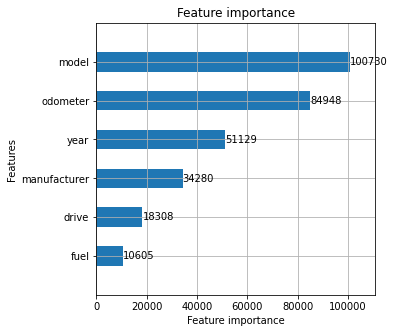

In [38]:
fig =  plt.figure(figsize = (5,5))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();
plt.close()

Ridge Regression

In [39]:
ridge = RidgeCV(cv = 5)
ridge.fit(train, target)
acc_model(10,ridge,train,test)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [11295.64394011 17765.23206818 17549.07104409 16246.11863299
 17125.4064606 ]
acc(r2_score) for training =  18.1
acc(relative error) for training = 55.08
acc(rmse) for training = 1282771.65
target_test = [10999 26000 14000  5998 21990]
ytest = [19544.38633952 20888.90287301 19678.75599202 13969.93457467
 22408.14622102]
acc(r2_score) for test = 17.52
acc(relative error) for test = 55.21
acc(rmse) for test = 1283432.32


Bagging Regressor

In [40]:
bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(11,bagging,train,test)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [12970.          8458.3         5939.         34590.
 15421.66666667]
acc(r2_score) for training =  96.05
acc(relative error) for training = 7.9
acc(rmse) for training = 281667.04
target_test = [10999 26000 14000  5998 21990]
ytest = [ 9815.56666667 29539.3        13842.          7741.9
 21471.        ]
acc(r2_score) for test = 77.96
acc(relative error) for test = 20.09
acc(rmse) for test = 663416.99


Extra Trees Regressor

In [41]:
etr = ExtraTreesRegressor()
etr.fit(train, target)
acc_model(12,etr,train,test)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [ 4500.  2000.  5300. 34590. 16495.]
acc(r2_score) for training =  99.9
acc(relative error) for training = 0.16
acc(rmse) for training = 45435.41
target_test = [10999 26000 14000  5998 21990]
ytest = [10338.   30671.06 13122.71  7321.91 21990.  ]
acc(r2_score) for test = 77.9
acc(relative error) for test = 18.88
acc(rmse) for test = 664401.92


Voting Regressor

In [42]:
# Voting_Reg = VotingRegressor(estimators=[('lin', lin_reg), ('ridge', ridge), ('sgd', sgd)])
Voting_Reg = VotingRegressor(estimators=[('etr', etr), ('random_forest', random_forest)])
Voting_Reg.fit(train, target)
acc_model(14,Voting_Reg,train,test)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [ 6391.075       3870.9         5881.6        34590.
 16488.86261905]
acc(r2_score) for training =  99.21
acc(relative error) for training = 3.61
acc(rmse) for training = 126356.94
target_test = [10999 26000 14000  5998 21990]
ytest = [10277.29980952 29074.755      14048.385       7500.925
 22067.105     ]
acc(r2_score) for test = 79.87
acc(relative error) for test = 18.48
acc(rmse) for test = 634065.12


In [72]:
import pickle
pickle.dump(Voting_Reg, open('voting_model.pkl', 'wb'))
# import bz2, os
# ofile = bz2.BZ2File("voting_reg_binary",'wb')
# pickle.dump(Voting_Reg,ofile)
# ofile.close()
 
# print(os.path.getsize("BinaryData"))

In [44]:
def compute_feature_importance(voting_clf, weights):
    feat_importance = dict()
    for est in voting_clf.estimators_:
        feat_importance[str(est)] = est.feature_importances_
    
    feat_scores = [0]*len(list(feat_importance.values())[0])
    for index, imp_score in enumerate(feat_importance.values()):
        imp_score_with_weight = imp_score * weights[index]
        feat_scores = list(np.add(feat_scores, list(imp_score_with_weight)))
    return feat_scores

In [45]:
voting_df = pd.DataFrame()
voting_df['Feature'] = train.columns
voting_df['Feature Importance'] = compute_feature_importance(Voting_Reg, [1, 1])
voting_df.sort_values('Feature Importance', ascending=False)

,Feature,Feature Importance
0,year,0.811943
1,odometer,0.354826
2,model,0.326760
4,fuel,0.199086
5,manufacturer,0.156351
3,drive,0.151034


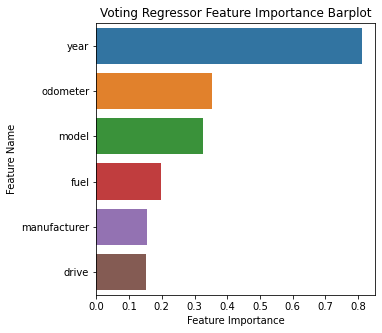

In [46]:
fig =  plt.figure(figsize = (5,5))
#Plot Searborn bar chart
sns.barplot(x = 'Feature Importance', y = 'Feature', data = voting_df, order = voting_df.sort_values('Feature Importance', ascending=False)['Feature'])
#Add chart labels
plt.title('Voting Regressor Feature Importance Barplot')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show();
plt.close()


Ada Boost

In [47]:
Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(13,Ada_Boost,train,test)

target =  [ 4500  2000  5300 34590 16995]
ytrain =  [21580.81688277 17121.96682744 17121.96682744 23813.22216059
 19584.4633747 ]
acc(r2_score) for training =  32.52
acc(relative error) for training = 52.6
acc(rmse) for training = 1164314.63
target_test = [10999 26000 14000  5998 21990]
ytest = [21580.81688277 28904.0981854  22506.2842493  12090.95524051
 30612.95087163]
acc(r2_score) for test = 31.85
acc(relative error) for test = 52.83
acc(rmse) for test = 1166675.02


Model Comparison

In [48]:
models = pd.DataFrame({
    'Model': ['LinearRegression', 'LinearSVR', 'SVR', 
              'MLPRegressor', 'SGDRegressor', 
              'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor', 'LGBM',
              'RidgeRegressor', 'BaggingRegressor', 'ExtraTreesRegressor', 
              'VotingRegressor', 'AdaBoostRegressor'],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [49]:
models.to_csv('tables.csv', index = False)

In [50]:
pd.options.display.float_format = '{:,.2f}'.format

In [51]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
8,LGBM,85.01,80.60,18.07,19.93,"548,848.96","622,494.40"
12,VotingRegressor,99.21,79.87,3.61,18.48,"126,356.94","634,065.12"
6,RandomForestRegressor,97.12,79.72,7.07,18.97,"240,435.01","636,476.67"
7,XGBRegressor,81.48,78.16,20.82,22.10,"610,049.87","660,418.48"
10,BaggingRegressor,96.05,77.96,7.90,20.09,"281,667.04","663,416.99"
11,ExtraTreesRegressor,99.90,77.90,0.16,18.88,"45,435.41","664,401.92"
5,DecisionTreeRegressor,99.90,64.70,0.16,23.50,"45,425.90","839,590.15"
3,MLPRegressor,60.76,60.16,33.06,33.27,"887,868.10","891,950.49"
13,AdaBoostRegressor,32.52,31.85,52.60,52.83,"1,164,314.63","1,166,675.02"
1,LinearSVR,20.43,20.43,48.65,48.58,"1,264,381.64","1,260,635.98"


In [52]:
print('Prediction accuracy for models by relative error - d_test')
models.sort_values(by=['d_test', 'd_train'], ascending=True)

Prediction accuracy for models by relative error - d_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
12,VotingRegressor,99.21,79.87,3.61,18.48,"126,356.94","634,065.12"
11,ExtraTreesRegressor,99.90,77.90,0.16,18.88,"45,435.41","664,401.92"
6,RandomForestRegressor,97.12,79.72,7.07,18.97,"240,435.01","636,476.67"
8,LGBM,85.01,80.60,18.07,19.93,"548,848.96","622,494.40"
10,BaggingRegressor,96.05,77.96,7.90,20.09,"281,667.04","663,416.99"
7,XGBRegressor,81.48,78.16,20.82,22.10,"610,049.87","660,418.48"
5,DecisionTreeRegressor,99.90,64.70,0.16,23.50,"45,425.90","839,590.15"
3,MLPRegressor,60.76,60.16,33.06,33.27,"887,868.10","891,950.49"
1,LinearSVR,20.43,20.43,48.65,48.58,"1,264,381.64","1,260,635.98"
2,SVR,-6.40,-8.98,50.46,50.60,"1,462,083.49","1,475,265.23"


In [53]:
print('Prediction accuracy for models by RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
8,LGBM,85.01,80.60,18.07,19.93,"548,848.96","622,494.40"
12,VotingRegressor,99.21,79.87,3.61,18.48,"126,356.94","634,065.12"
6,RandomForestRegressor,97.12,79.72,7.07,18.97,"240,435.01","636,476.67"
7,XGBRegressor,81.48,78.16,20.82,22.10,"610,049.87","660,418.48"
10,BaggingRegressor,96.05,77.96,7.90,20.09,"281,667.04","663,416.99"
11,ExtraTreesRegressor,99.90,77.90,0.16,18.88,"45,435.41","664,401.92"
5,DecisionTreeRegressor,99.90,64.70,0.16,23.50,"45,425.90","839,590.15"
3,MLPRegressor,60.76,60.16,33.06,33.27,"887,868.10","891,950.49"
13,AdaBoostRegressor,32.52,31.85,52.60,52.83,"1,164,314.63","1,166,675.02"
1,LinearSVR,20.43,20.43,48.65,48.58,"1,264,381.64","1,260,635.98"


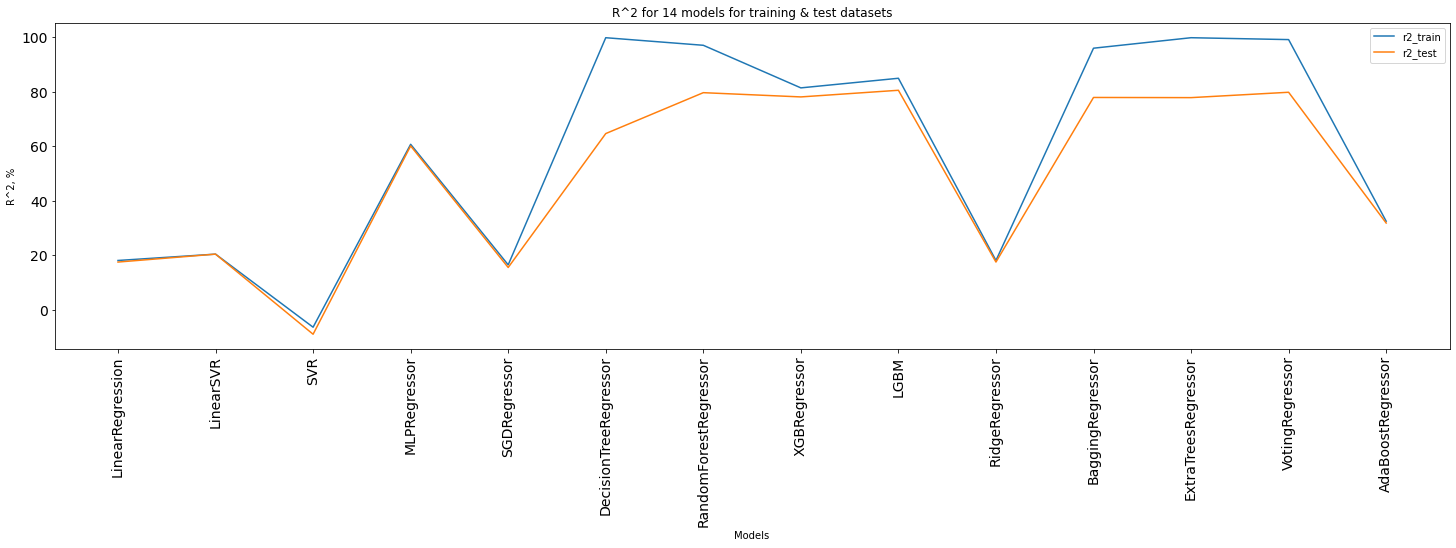

In [54]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R^2 for 14 models for training & test datasets')
plt.xlabel('Models')
plt.ylabel('R^2, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

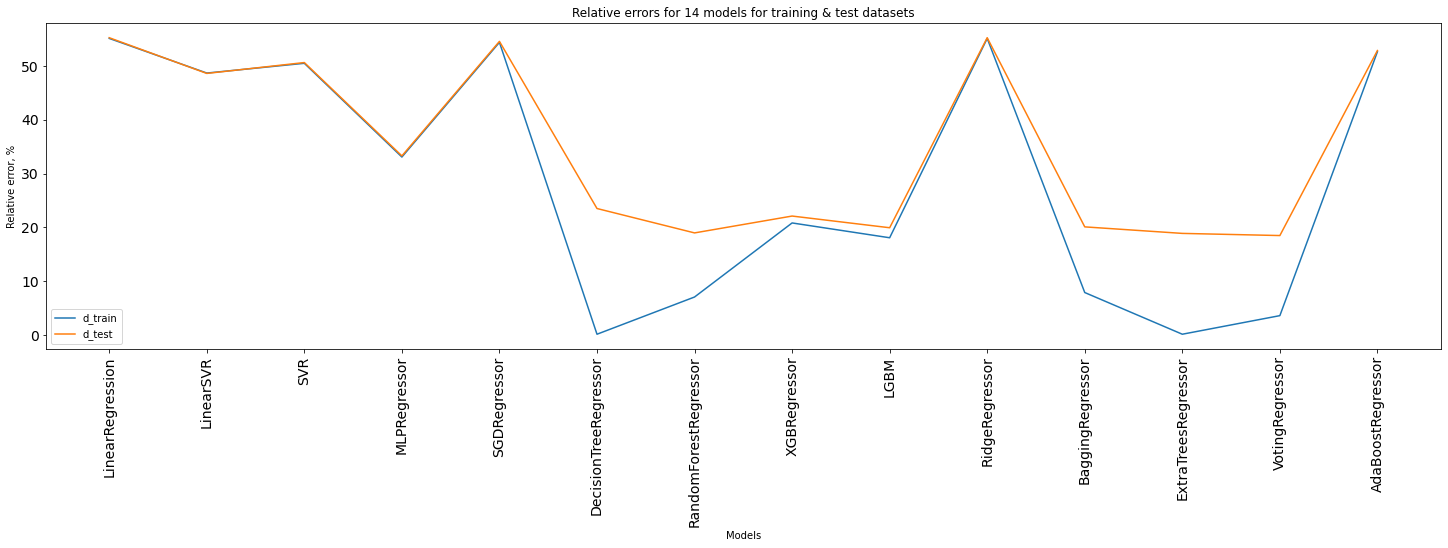

In [55]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['d_train'], label = 'd_train')
plt.plot(xx, models['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for 14 models for training & test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

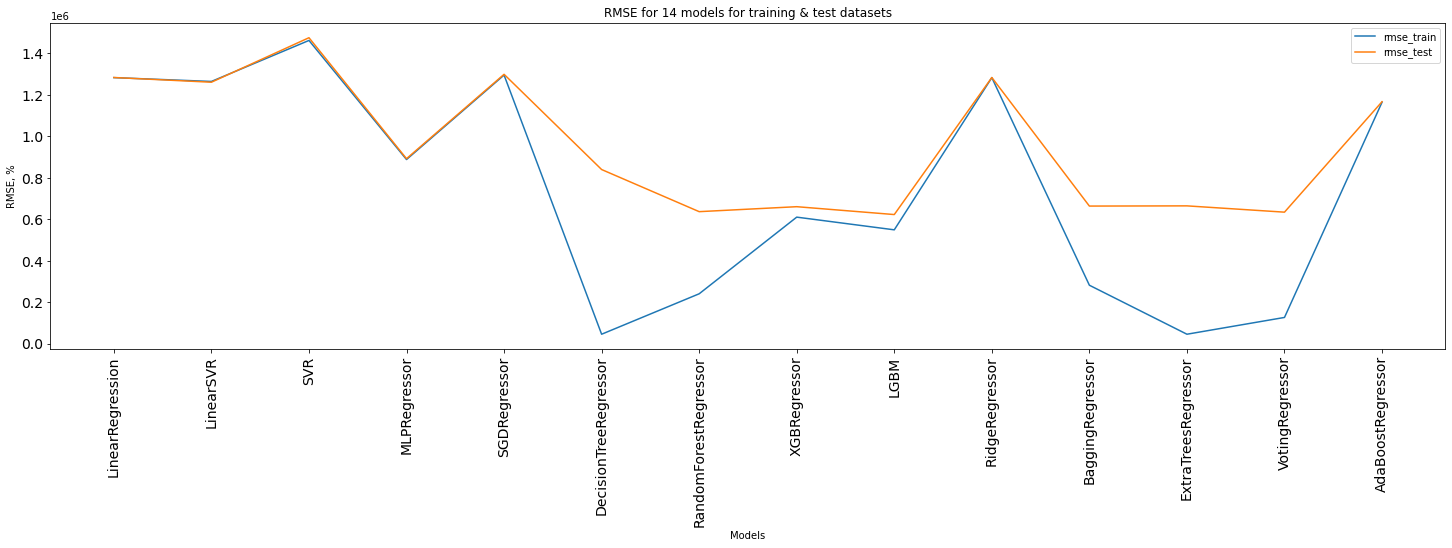

In [56]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for 14 models for training & test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

Prediction

In [57]:
test0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54534 entries, 146134 to 153931
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          54534 non-null  float64
 1   odometer      54534 non-null  int64  
 2   model         54534 non-null  int64  
 3   drive         54534 non-null  int64  
 4   fuel          54534 non-null  int64  
 5   manufacturer  54534 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 2.9 MB


In [59]:
test0.head(3)

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
146134,"2,018.00",31,1903,4,7,2,106000,0,0,2,3,6,6,26
206823,"2,009.00",38,18041,0,3,2,56391,0,0,0,4,0,5,37
124550,"2,019.00",17,18802,2,7,5,35231,0,0,2,3,8,6,19


In [60]:
testn = pd.DataFrame(scaler.transform(test0), columns = test0.columns)

In [61]:
lin_reg.fit(train0, train_target0)
lin_reg.predict(testn)[:3]

array([23175.07195641,  9843.86649268, 17796.7136565 ])

In [62]:
ridge.fit(train0, train_target0)
ridge.predict(testn)[:3]

array([23174.83475874,  9844.30525139, 17796.9830599 ])